1.Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties

2. Stochastic GD: we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights

3. Mini batch GD: we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load the dataset

In [4]:
data = pd.read_csv(r'C:\Users\Yash Kumar\Documents\homeprices_banglore - Copy.csv')
data.sample(5)

,area,bedrooms,price
5,1170,2,38.0
8,1310,3,50.0
17,1540,3,60.0
7,3300,4,155.0
13,1100,2,40.0


### Preprocessing: Scale the data

In [7]:
data['price'].values

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [6]:
data['price'].values.reshape(data.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(data.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(data['price'].values.reshape(data.shape[0],1))

scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [14]:
scaled_y.shape

(20, 1)

In [13]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

### Batch Gradient Descent Implementation

In [15]:
np.random.permutation(20)

array([ 6,  0,  1,  7, 14, 18, 15, 10, 17,  5,  8, 16,  2,  3,  4, 11, 12,
        9, 19, 13])

In [17]:
def mini_batch_gradient_descent(x, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = x.shape[1]
    # here the number of features = 3(area, bedrooms, price)
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = x.shape[0] # number of rows in x
    if batch_size > total_samples: # In this case mini batch becomes same as gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            xj = x_tmp[j: j+batch_size]
            yj = y_tmp[j: j+batch_size]
            y_predicted = np.dot(w, xj.T) + b
            
            w_grad = -(2/len(xj))*(xj.T.dot(yj - y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj - y_predicted)
            
            w = w - learning_rate*w_grad
            b = b - learning_rate*b_grad
            
            cost = np.mean(np.square(yj - y_predicted)) # MSE(Mean Squared Error)
            
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
       scaled_x,
      scaled_y.reshape(scaled_y.shape[0],),
      epochs = 120,
     batch_size = 5
    
)

w, b, cost

(array([0.70998322, 0.67811211]), -0.2332486856512236, 0.0027892656815051474)

### Plot epoch vs cost graph

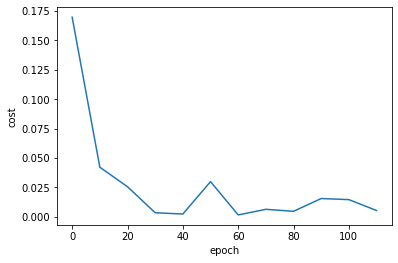

In [18]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

### Now do some prediction now

In [19]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict(2600, 4, w, b)

128.66197546885934

In [20]:
predict(1000,2,w, b)

30.007899635047146

In [21]:
predict(1500,3,w,b)

69.41965469248137